<a href="https://colab.research.google.com/github/ShivaniGawande/DLFinalProject_Fall22/blob/main/RNN_LSTM_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
import pandas as pd
import seaborn as sns
import gensim
import re, string, unicodedata
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU, SpatialDropout1D
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.preprocessing.text import Tokenizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
#loading data from google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#train_file_id = '15NNft0C1CKlKDzjUKbAgibbXTFe8NFgG'
test_file_id = '1J4K-z82tEr4jkwG1Hl1t-eigpcivqt3k' 
'''
download = drive.CreateFile({'id': train_file_id})
download.GetContentFile('train.csv')
train_data  = pd.read_csv("train.csv")
train_data.head()
'''
url = "https://raw.githubusercontent.com/EducationalTestingService/sarcasm/master/twitter/sarcasm_detection_shared_task_twitter_training.jsonl"
url2 ='https://raw.githubusercontent.com/wjq-learning/MSTI/main/datasets/Textual%20target%20labels/train'
df = pd.read_json(url, lines=True)
print(df.head())
     

     label                                           response  \
0  SARCASM  @USER @USER @USER I don't get this .. obviousl...   
1  SARCASM  @USER @USER trying to protest about . Talking ...   
2  SARCASM  @USER @USER @USER He makes an insane about of ...   
3  SARCASM  @USER @USER Meanwhile Trump won't even release...   
4  SARCASM  @USER @USER Pretty Sure the Anti-Lincoln Crowd...   

                                             context  
0  [A minor child deserves privacy and should be ...  
1  [@USER @USER Why is he a loser ? He's just a P...  
2  [Donald J . Trump is guilty as charged . The e...  
3  [Jamie Raskin tanked Doug Collins . Collins lo...  
4  [Man ... y ’ all gone “ both sides ” the apoca...  


In [39]:
df.isna().sum() # Checking for NaN values

label       0
response    0
context     0
dtype: int64

In [40]:
df.head()

,label,response,context
0,SARCASM,@USER @USER @USER I don't get this .. obviousl...,[A minor child deserves privacy and should be ...
1,SARCASM,@USER @USER trying to protest about . Talking ...,[@USER @USER Why is he a loser ? He's just a P...
2,SARCASM,@USER @USER @USER He makes an insane about of ...,[Donald J . Trump is guilty as charged . The e...
3,SARCASM,@USER @USER Meanwhile Trump won't even release...,[Jamie Raskin tanked Doug Collins . Collins lo...
4,SARCASM,@USER @USER Pretty Sure the Anti-Lincoln Crowd...,[Man ... y ’ all gone “ both sides ” the apoca...


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


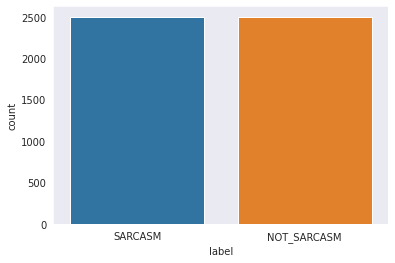

In [41]:
sns.set_style("dark")
sns.countplot(df.label)

In [42]:
for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
df2 = df['response'].copy()
#df2['context'] = df['context'].copy()
tokenizer.fit_on_texts(df2.values)
X = tokenizer.texts_to_sequences(df2.values)
X = pad_sequences(X)

In [43]:
Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3350, 61) (3350, 2)
(1650, 61) (1650, 2)


In [44]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [45]:
batch_size = 32
history = model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size, verbose = 2)

Epoch 1/20
105/105 - 28s - loss: 0.6241 - accuracy: 0.6493 - 28s/epoch - 270ms/step
Epoch 2/20
105/105 - 25s - loss: 0.4906 - accuracy: 0.7573 - 25s/epoch - 239ms/step
Epoch 3/20
105/105 - 24s - loss: 0.3928 - accuracy: 0.8266 - 24s/epoch - 231ms/step
Epoch 4/20
105/105 - 24s - loss: 0.3049 - accuracy: 0.8710 - 24s/epoch - 233ms/step
Epoch 5/20
105/105 - 24s - loss: 0.2433 - accuracy: 0.8964 - 24s/epoch - 230ms/step
Epoch 6/20
105/105 - 24s - loss: 0.1957 - accuracy: 0.9254 - 24s/epoch - 232ms/step
Epoch 7/20
105/105 - 25s - loss: 0.1398 - accuracy: 0.9493 - 25s/epoch - 241ms/step
Epoch 8/20
105/105 - 24s - loss: 0.1233 - accuracy: 0.9525 - 24s/epoch - 233ms/step
Epoch 9/20
105/105 - 24s - loss: 0.1048 - accuracy: 0.9591 - 24s/epoch - 231ms/step
Epoch 10/20
105/105 - 25s - loss: 0.0806 - accuracy: 0.9731 - 25s/epoch - 234ms/step
Epoch 11/20
105/105 - 25s - loss: 0.0545 - accuracy: 0.9794 - 25s/epoch - 235ms/step
Epoch 12/20
105/105 - 25s - loss: 0.0565 - accuracy: 0.9788 - 25s/epoch - 

In [46]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

5/5 - 0s - loss: 1.9050 - accuracy: 0.6667 - 382ms/epoch - 76ms/step
score: 1.90
acc: 0.67


In [51]:
print(history.history)

{'loss': [0.6240534782409668, 0.49064019322395325, 0.392843097448349, 0.3048819601535797, 0.24334628880023956, 0.19573785364627838, 0.1398385912179947, 0.12334340810775757, 0.10477493703365326, 0.0806303396821022, 0.05450636148452759, 0.05647080019116402, 0.05362055078148842, 0.039836738258600235, 0.049926478415727615, 0.033395133912563324, 0.037485264241695404, 0.038071244955062866, 0.03037063404917717, 0.02417895384132862], 'accuracy': [0.6492537260055542, 0.7573134303092957, 0.8265671730041504, 0.8710447549819946, 0.8964179158210754, 0.9253731369972229, 0.9492537379264832, 0.9525372982025146, 0.9591044783592224, 0.9731343388557434, 0.9794029593467712, 0.9788059592247009, 0.9823880791664124, 0.9862686395645142, 0.9808955192565918, 0.988358199596405, 0.9892537593841553, 0.9856716394424438, 0.9910447597503662, 0.9925373196601868]}


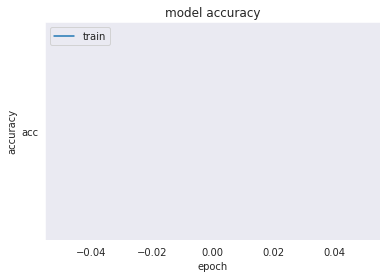

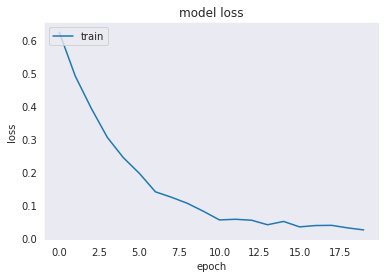

<Figure size 432x288 with 0 Axes>

In [52]:
# summarize history for accuracy
plt.plot('acc')
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [50]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("Sarcasm_acc", pos_correct/pos_cnt*100, "%")
print("Non-Sarcasm_acc", neg_correct/neg_cnt*100, "%")

1/1 - 0s - 264ms/epoch - 264ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 37ms/epoch - 37ms/step
1/1 - 0s - 26ms/epoch - 26ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 57ms/epoch - 57ms/step
1/1 - 0s - 55ms/epoch - 55ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 26ms/epoch - 26ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 34ms/epoch - 34ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 26ms/epoch - 26ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 26ms/epoch - 26ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 2

# Test

In [53]:
#loading data from google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#train_file_id = '15NNft0C1CKlKDzjUKbAgibbXTFe8NFgG'
test_file_id = '1J4K-z82tEr4jkwG1Hl1t-eigpcivqt3k' 
'''
download = drive.CreateFile({'id': train_file_id})
download.GetContentFile('train.csv')
train_data  = pd.read_csv("train.csv")
train_data.head()
'''

download = drive.CreateFile({'id': test_file_id})
download.GetContentFile('test.csv')
test_data  = pd.read_csv("test.csv")
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [59]:
test = [' Thank goodness ... Power was back on after 16 hours . 😱 😱 😠 Could have been only in 2020 🤣 🤣']
test = tokenizer.texts_to_sequences(test)
test = pad_sequences(test, maxlen=100, dtype='int32', value=0)

sentiment = model.predict(test,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcasm")

1/1 - 0s - 29ms/epoch - 29ms/step
Non-sarcastic
